# Name: Ritika Patil

## The sparks Foundation

## Task 2: Prediction using Unsupervised ML

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\KETAN\\Desktop'

### Reading the Dataset

In [3]:
dataset = pd.read_csv('Iris.csv')
dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
dataset.drop('Id', axis=1, inplace=True) #Dropping 'Id' column 


### Exploring Dataset

In [5]:
dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
dataset.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Checking for Null values

In [9]:
dataset.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Checking Correlation between Features 

In [10]:
dataset.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


### Data Visualization

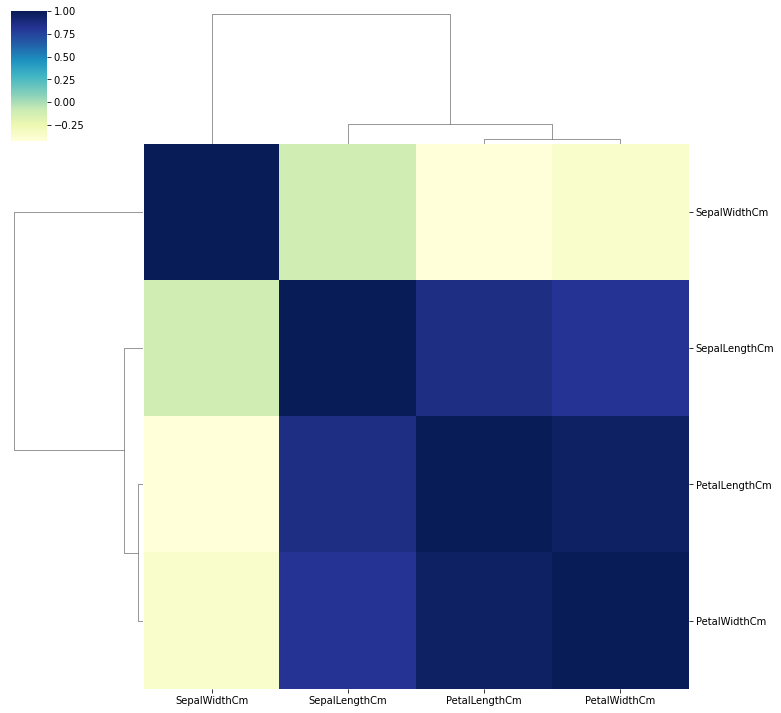

In [11]:
correlation = dataset.corr()
 
result = sns.clustermap(correlation, cmap ="YlGnBu");
plt.setp(result.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0)

result


### Importing KMeans Algorithm  and checking for intial K value using Elbow method

In [12]:
from sklearn.cluster import KMeans
x = dataset.iloc[:,0:4].values
WCSS=[]                      #Within-Cluster-Sum-of-Squares

for i in range(1,30):
    model = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    model.fit(x)
    WCSS.append(model.inertia_)  # kmeans.inertia_ returns the WCSS value for an initialized cluster
                                                                    
    
print(WCSS)

[680.8243999999996, 152.36870647733915, 78.94084142614601, 57.34540931571815, 46.535582051282034, 38.93873974358975, 34.190687924796634, 29.90537429982511, 27.927882157034986, 25.955497086247092, 24.416268037518037, 22.71167478354979, 21.356951298701308, 19.90584794372295, 18.68692748917749, 17.89992748917749, 17.11061507936509, 16.04673412698413, 15.462845238095243, 14.333956349206362, 14.018785666088307, 13.553097374847376, 12.903454517704523, 12.384906898656899, 12.052797619047618, 11.550215007215007, 11.330777777777781, 11.057786435786436, 10.749309523809519]


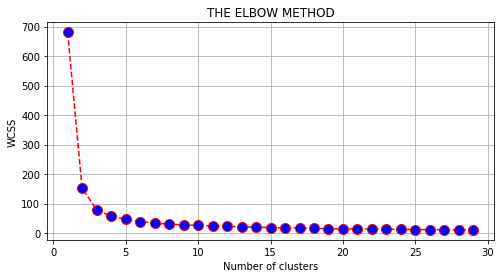

In [13]:
plt.figure(figsize=(8, 4))
plt.plot(range(1, 30), WCSS, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('THE ELBOW METHOD')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

### Prediction
### As per the Elbow method graph the optimun point is 3

In [14]:
model= KMeans(n_clusters=3,random_state=0)
y= model.fit(x)
y=model.predict(x)
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### Visual representation of  3 clusters with its Centroid

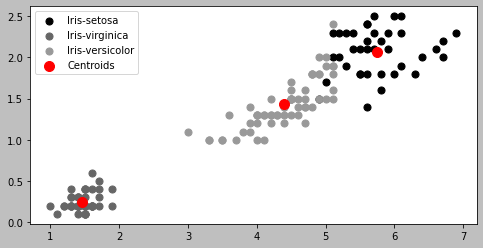

In [15]:
from matplotlib import style
style.use('grayscale')
plt.figure(figsize=(8, 4))
plt.scatter(x[y == 0,2],x[y == 0,3], label= 'Iris-setosa', s=50)
plt.scatter(x[y == 1,2],x[y == 1,3], label= 'Iris-virginica',s=50)
plt.scatter(x[y == 2,2],x[y == 2,3], label= 'Iris-versicolor',s=50)

plt.scatter(model.cluster_centers_[:, 2], model.cluster_centers_[:, 3], s = 100, c = 'red', label = 'Centroids')
plt.legend()
plt.show()